<a href="https://colab.research.google.com/github/TheCiceerGuy/Simulation_Modeling-Labs/blob/main/A%20Pure%20Pursuit%20Problem%20in%20Continuous%20Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

t(min) XF       YF       XB       YB       Distance  
--------------------------------------------------
0      0.00     40.00    80.00    0.00     89.44     
1      17.89    31.06    90.00    -2.00    79.33     
2      36.07    22.72    99.00    -5.00    68.77     
3      54.37    14.66    105.00   -9.00    55.88     
4      72.49    6.19     115.00   -15.00   47.50     
5      90.39    -2.73    123.00   -18.00   36.01     
6      108.50   -11.21   131.00   -23.00   25.40     
7      126.22   -20.49   139.00   -29.00   15.35     
8      142.87   -31.57   149.00   -28.00   7.10      

✅ Target caught at t = 8 minutes, distance = 7.10 km


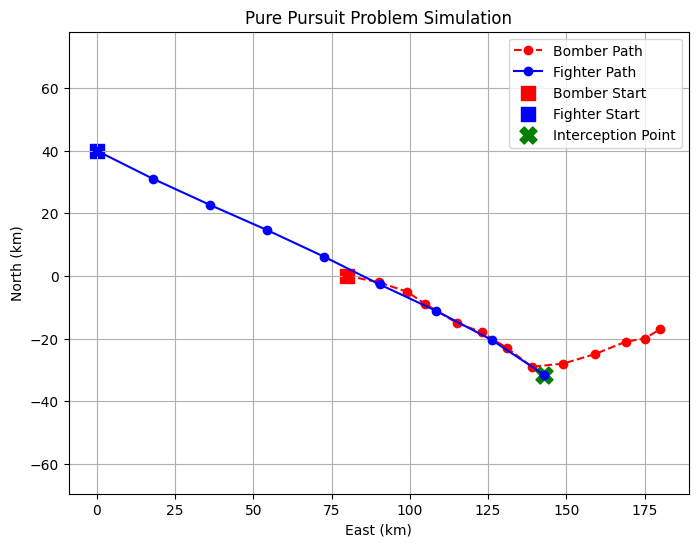

In [2]:
import math
import matplotlib.pyplot as plt

# Bomber path data (time in minutes, positions in km)
XB = [80, 90, 99, 105, 115, 123, 131, 139, 149, 159, 169, 175, 180]
YB = [0,  -2,  -5,  -9, -15, -18, -23, -29, -28, -25, -21, -20, -17]

# Fighter's initial position (km)
XF = 0
YF = 40

# Fighter's speed (km/min)
VF = 20

# Capture distance threshold (km)
capture_distance = 10

# Simulation parameters
t = 0
max_time = 12

# For plotting
fighter_path_x = [XF]
fighter_path_y = [YF]
bomber_path_x = [XB[0]]
bomber_path_y = [YB[0]]

# Table header
print(f"{'t(min)':<6} {'XF':<8} {'YF':<8} {'XB':<8} {'YB':<8} {'Distance':<10}")
print("-" * 50)

caught = False

while True:
    # Bomber's current position
    xb_t = XB[t]
    yb_t = YB[t]

    # Distance between fighter and bomber
    dx = xb_t - XF
    dy = yb_t - YF
    distance = math.sqrt(dx**2 + dy**2)

    # Print table row
    print(f"{t:<6} {XF:<8.2f} {YF:<8.2f} {xb_t:<8.2f} {yb_t:<8.2f} {distance:<10.2f}")

    # Check interception condition
    if distance <= capture_distance:
        print(f"\n✅ Target caught at t = {t} minutes, distance = {distance:.2f} km")
        caught = True
        break

    # Check escape condition
    if t >= max_time:
        print("\n❌ Target escaped")
        break

    # Move fighter towards bomber
    angle = math.atan2(dy, dx)  # direction towards bomber
    XF += VF * math.cos(angle)
    YF += VF * math.sin(angle)

    # Store paths for plotting
    fighter_path_x.append(XF)
    fighter_path_y.append(YF)
    bomber_path_x.append(XB[t])
    bomber_path_y.append(YB[t])

    # Advance time
    t += 1

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(XB, YB, 'r--o', label="Bomber Path")
plt.plot(fighter_path_x, fighter_path_y, 'b-o', label="Fighter Path")
plt.scatter(XB[0], YB[0], c='red', marker='s', s=100, label="Bomber Start")
plt.scatter(fighter_path_x[0], fighter_path_y[0], c='blue', marker='s', s=100, label="Fighter Start")

if caught:
    plt.scatter(fighter_path_x[-1], fighter_path_y[-1], c='green', marker='X', s=150, label="Interception Point")
else:
    plt.scatter(fighter_path_x[-1], fighter_path_y[-1], c='orange', marker='X', s=150, label="Final Fighter Position")

plt.xlabel("East (km)")
plt.ylabel("North (km)")
plt.title("Pure Pursuit Problem Simulation")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()
